In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

هذين السطرين يقومان بتحديد المتغيرات المستقلة (x) والمتغير المعتمد (y) من البيانات. x يحتوي على جميع الأعمدة ماعدا العمود الأخير، و y يحتوي فقط على العمود الأخير.

In [22]:
dataset = pd.read_csv('d:\project\Social_Network_Ads.csv')
x = dataset.iloc[:, :-1]
y=dataset.iloc[:, -1]

In [23]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [24]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

هذا السطر يستورد دالة train_test_split من مكتبة sklearn والتي تستخدم لتقسيم البيانات إلى مجموعة تدريب ومجموعة اختبار.

In [26]:
from sklearn.model_selection import train_test_split

# قسم البيانات إلى مجموعة تدريب ومجموعة اختبار
# حجم الاختبار هنا هو 25٪ من البيانات الكلية
# القيمة العشوائية تُستخدم هنا لتكرار النتائج
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# طباعة مجموعة البيانات التدريبية
print(x_train)


     Age  EstimatedSalary
250   44            39000
63    32           120000
312   38            50000
159   32           135000
283   52            21000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[300 rows x 2 columns]


In [27]:
print(y_train)

250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 300, dtype: int64


In [28]:
x_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
146,27,96000
135,23,63000
390,48,33000
264,48,90000


In [29]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64

السطر الأول: from sklearn.preprocessing import StandardScaler يستيرد فئة StandardScaler من مكتبة sklearn.preprocessing. هذه الفئة تُستخدم لتطبيق تحويلات على البيانات.


السطر الثاني:
 sc = StandardScaler() ينشئ كائنًا من الفئة StandardScaler باسم sc. سيتم استخدام هذا الكائن لتحويل البيانات.


السطر الثالث: x_train = sc.fit_transform(X_train) يقوم بتحويل مجموعة التدريب X_train باستخدام الكائن sc. يتم حساب المتوسط والانحراف المعياري لكل سمة في X_train ويتم تحويل البيانات وفقًا لهذه المعلومات.


السطر الرابع: x_test = sc.transform(X_test) يقوم بتحويل مجموعة الاختبار X_test باستخدام الكائن sc. يتم تحويل البيانات بناءً على نفس المعلومات (المتوسط والانحراف المعياري) التي تم حسابها في مجموعة التدريب، وذلك للحفاظ على التوافق في التحويلات بين المجموعتين.

عملية التحويل التي تم استخدامها هي تحويل البيانات إلى متوسط صفري وانحراف معياري واحد باستخدام StandardScaler.

عملية التحويل تعتمد على العمليات الرياضية التالية:

حساب المتوسط الحسابي للبيانات.
حساب الانحراف المعياري للبيانات.
استخدام الصيغة التالية لتحويل البيانات:
X_scaled = (X - mean) / std
حيث X هي القيمة الأصلية للبيانات، وmean هو المتوسط الحسابي، وstd هو الانحراف المعياري.
بعد التحويل، ستكون البيانات المحولة لديها متوسط قريب جداً من الصفر وانحراف معياري قريب جداً من الواحد.
عملية التحويل باستخدام StandardScaler تساعد في توحيد مقياس البيانات وتحسين قدرتها على التعامل مع النماذج والخوارزميات التحليلية.






In [30]:
#هذا السطر يستورد الفئة StandardScaler من مكتبة sklearn والتي تستخدم لتحويل البيانات بحيث يتم تنظيمها في مستوى واحد.
from sklearn.preprocessing import StandardScaler

# إنشاء كائن من فئة StandardScaler
sc = StandardScaler()

# تحويل مجموعة التدريب باستخدام StandardScaler
#هذا السطر يقوم بتحويل مجموعة التدريب (x_train) باستخدام StandardScaler. تم استخدام دالة fit_transform لتنفيذ عملية التحويل وتدريب النموذج على مجموعة التدريب في نفس الوقت.
x_train = sc.fit_transform(x_train)

# تحويل مجموعة الاختبار باستخدام StandardScaler
x_test = sc.transform(x_test)
cy=StandardScaler()


In [31]:
x_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [32]:
y_train

250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 300, dtype: int64

In [33]:
x_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [34]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64

بعد ذلك، يتم تدريب النموذج باستخدام بيانات التدريب عن طريق استدعاء الدالة fit على الكائن classifier وتمرير x_train و y_train كمعاملات:

In [35]:
#creat your classfication 

فائدة ووظيفة تدريب النموذج باستخدام بيانات التدريب هي تعلم النموذج كيفية التكيف وضبط المعاملات الداخلية لتحقيق أفضل أداء ممكن في التصنيف. عند استدعاء الدالة fit() على النموذج (classifier) وتمرير بيانات التدريب (x_train و y_train) كمعاملات، يتم تحسين المعاملات الداخلية للنموذج بحيث يتوافق تصنيفه مع القيم الحقيقية في بيانات التدريب.

عند تدريب النموذج، يتم تحديث المعاملات بناءً على الخوارزميات المستخدمة في النموذج، مثل الانحدار اللوجستي. يتم مراقبة أداء النموذج خلال العملية وتحسينه بحيث يتم تحقيق أقصى قدر من الدقة في التصنيف.

بعد اكتمال عملية التدريب، يكون النموذج جاهزًا لاستخدامه في التصنيف لبيانات جديدة غير معروفة، حيث يتم استخدام المعاملات المحسنة للنموذج لتوقع الفئة الصحيحة للبيانات الجديدة.






In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)#الدالة fit وتمرير متغيرات x_train و y_train كمعاملات.هذا السطر يقوم بتدريب النموذج باستخدام بيانات التدريب، حيث يتم استدعاء


#هذا السطر يستورد الفئة KNeighborsClassifier من مكتبة sklearn وينشئ كائن من هذه الفئة لتنفيذ خوارزمية K-Nearest Neighbors (KNN). تم تعيين عدد الجيران n_neighbors=5 والمقياس المستخدم هو المسافة الاقليدية minkowski والقوة p=2 (المعروفة أيضًا بالقوة الأوراقية).

KNeighborsClassifier()

In [37]:
y_pred=(classifier.predict(x_test))#هذا السطر يستخدم النموذج المدرب للتنبؤ بفئات مجموعة الاختبار وتخزين النتائج في متغير y_pred.
a=pd.DataFrame(y_pred)#هذا السطر ينشئ DataFrame من نتائج التنبؤ ويسمى a
a


,0
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,1
98,1


عد تنفيذ الكود، ستحصل على جدول يعرض مصفوفة الارتباط بشكل منظم وسهل القراءة. ستكون الصفوف تمثل الفئة الحقيقية (Actual Class)، والأعمدة ستكون تمثل الفئة المتنبأة (Predicted Class). يمكنك قراءة القيم في الجدول لمعرفة عدد الحالات الصحيحة والخاطئة في التصنيف.






In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#هذين السطرين يستوردان دوال confusion_matrix و accuracy_score من مكتبة sklearn ويتم استخدامهما لحساب مصفوفة الالتباس ودقة النموذج على مجموعة الاختبار.
print(cm)
accuracy_score(y_test, y_pred)#هذا السطر يحسب دقة النموذج ويطبع النتيجة

[[64  4]
 [ 3 29]]


0.93

C:\Users\msi-pc\AppData\Local\Temp\ipykernel_14272\415622892.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


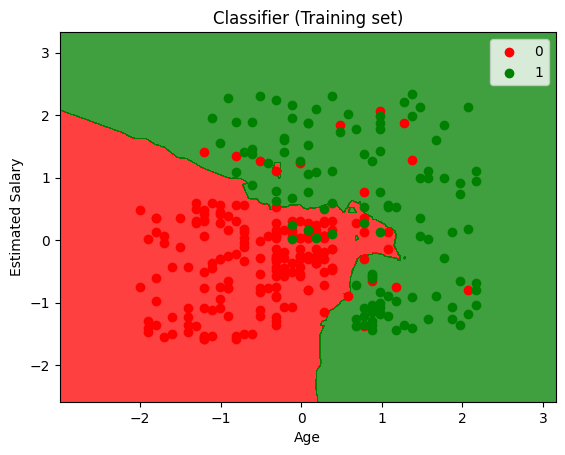

In [39]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title("Classifier (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()


C:\Users\msi-pc\AppData\Local\Temp\ipykernel_14272\702382244.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


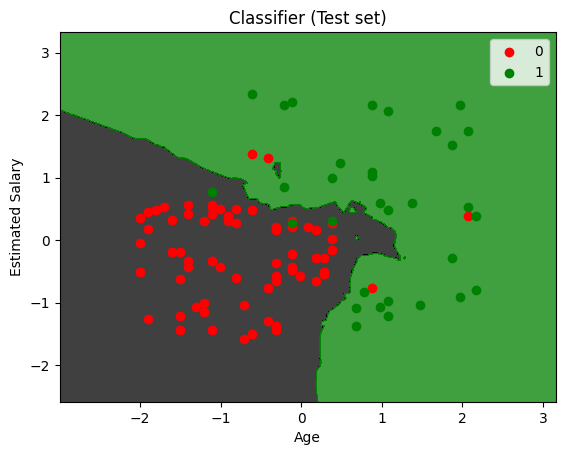

In [40]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('black', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title("Classifier (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()
